<a href="https://colab.research.google.com/github/joedetDS/FIFA_Ideal_XI/blob/main/Football_data_analysis(FIFA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="/content/fifa-cover.jpg" alt="FIFA Cover Image">

# **Introduction**
The dataset used in this analysis contains detailed player statistics from FIFA tournaments, encompassing various attributes such as overall ratings, positions, and performance metrics. With 18207 rows and 89 columns, the dataset provides comprehensive insights into player roles and capabilities, enabling the identification of the ideal FIFA first eleven team.

# **Problem Statement**  
The primary aim of this analysis is to identify the ideal FIFA first eleven team based on player performance during the tournament. This involves evaluating player attributes to select the top 3 defenders, 10 midfielders, and 10 forwards based on their overall ratings.


# **Objective**
The objectives of this analysis are to identify:

- the top 3 defenders (RB, CB, LB) based on their overall ratings and evaluate their contributions to the team's performance

- determine the top 10 midfielders across various roles ('RCM', 'LCM', 'LDM', 'CAM', 'CDM', 'RM', 'LAM', 'LM', 'RDM', 'CM', 'RAM') and analyze their influence on team dynamics

- select the top 10 forwards ('RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RW', 'CF') by examining their overall ratings and positional strengths, visualize player performance metrics across positions to provide clear insights into the ideal first eleven team.

# **Imports**

In [ ]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
import pandas as pd
import numpy as np

In [ ]:
# Load the dataset

file_path = '/content/FIFA-2019.csv'
data = pd.read_csv(file_path)
data.head()


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
ID,0
Name,0
Age,0
Photo,0
...,...
GKHandling,48
GKKicking,48
GKPositioning,48
GKReflexes,48


In [ ]:
data.shape

(18207, 89)

The dataset overall, has a total of 18,207 rows and 89 columns. There exists null values in the columns, related to the goal keeping dept.

I will focus on the necessary columns for the basis of my analysis.

In [ ]:

# Select relevant columns
columns_to_keep = [
    'Name', 'Overall', 'Position',
    'StandingTackle', 'SlidingTackle', 'Interceptions', 'Marking', 'Stamina',  # Defenders
    'ShortPassing', 'BallControl', 'Vision', 'Agility',  # Midfielders
    'Finishing', 'Dribbling', 'Positioning', 'ShotPower', 'Acceleration', 'Club', 'Nationality'  # Forwards
]
fifa_subset = data[columns_to_keep]

# Drop rows with missing values
fifa_cleaned = fifa_subset.dropna()


In [ ]:
fifa_cleaned.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

# Exploratory Data Analysis on FIFA world cup 2022 Dataset

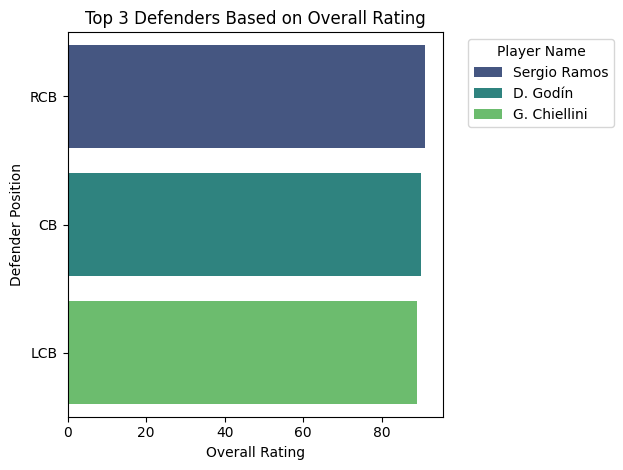

In [ ]:
# Filter relevant columns
columns_to_keep = ['Name', 'Overall', 'Position']
fifa_subset = data[columns_to_keep]

# Drop rows with missing values
fifa_cleaned = fifa_subset.dropna()

# Define defender positions
defender_positions = ['RB', 'CB', 'LB', 'RCB', 'LCB', 'RWB', 'LWB']

# Filter for defenders
fifa_defenders = fifa_cleaned[fifa_cleaned['Position'].isin(defender_positions)]

# Get the top 3 defenders based on Overall rating
top_defenders = fifa_defenders.nlargest(3, 'Overall')

# Visualize the top defenders
sns.barplot(x='Overall', y='Position', data=top_defenders, palette='viridis', hue='Name')
plt.title('Top 3 Defenders Based on Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Defender Position')

# Move the legend outside the chart
plt.legend(title='Player Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



This chart showcases Sergio Ramos, Diego Godín, and Giorgio Chiellini as the top defenders, with their roles as RCB, CB, and LCB providing a well-rounded representation of central defense.

The insight drawn is that Sergio Ramos, Diego Godín, and Giorgio Chiellini as the top defenders, with their roles as RCB, CB, and LCB providing a well-rounded representation of central defense.

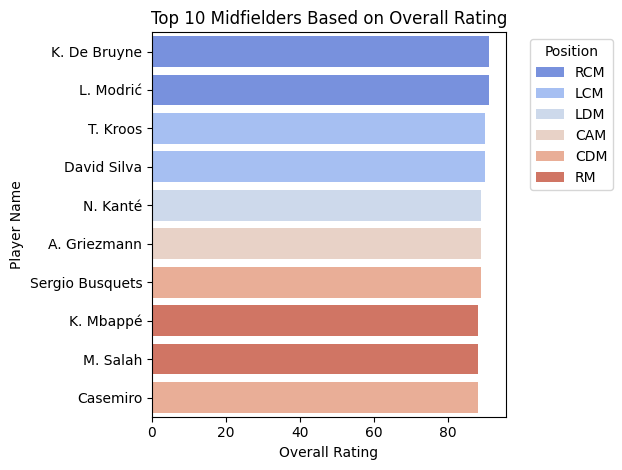

In [ ]:

# Filter relevant columns
columns_to_keep = ['Name', 'Overall', 'Position']
fifa_subset = data[columns_to_keep]

# Drop rows with missing values
fifa_cleaned = fifa_subset.dropna()

# Define midfielder positions
midfielder_positions = ['RCM', 'LCM', 'LDM', 'CAM', 'CDM', 'RM', 'LAM', 'LM', 'RDM', 'CM', 'RAM']

# Filter for midfielders
fifa_midfielders = fifa_cleaned[fifa_cleaned['Position'].isin(midfielder_positions)]

# Get the top 10 midfielders based on Overall rating
top_midfielders = fifa_midfielders.nlargest(10, 'Overall')

# Visualize the top midfielders
#plt.figure(figsize=(10, 6))
sns.barplot(x='Overall', y='Name', data=top_midfielders, palette='coolwarm', hue='Position')
plt.title('Top 10 Midfielders Based on Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Player Name')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


From the barplot Kevin De Bruyne, Luka Modrić, and Toni Kroos are absolute standouts when it comes to top-rated midfielders, but you’ve also got guys like David Silva, N’Golo Kanté, and Casemiro bringing their defensive grit and creative magic to the table. And then there’s the versatility of players like Kylian Mbappé and Mohamed Salah—these guys can do it all.

Insight drawn is that the dominance of versatile and high-impact midfielders, with Kevin De Bruyne, Luka Modrić, and Toni Kroos standing out as the most highly rated. Players like David Silva, N’Golo Kanté, and Casemiro bring a balance of creative and defensive capabilities, while the inclusion of Kylian Mbappé and Mohamed Salah hints at their adaptability to influence midfield play despite being forwards by trade.

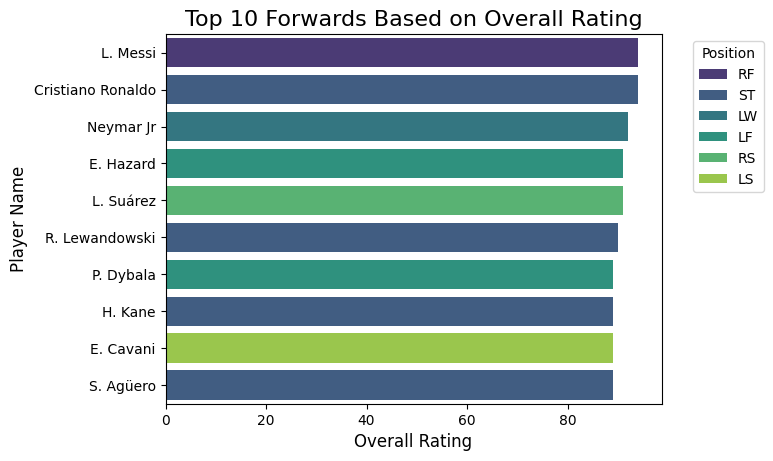

In [ ]:

# Define forward positions
forward_positions = ['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RW', 'CF']

# Filter for forwards
fifa_forwards = fifa_cleaned[fifa_cleaned['Position'].isin(forward_positions)]

# Get the top 10 forwards based on Overall rating
top_forwards = fifa_forwards.nlargest(10, 'Overall')

# Visualize the top forwards
#plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Overall', y='Name', data=top_forwards, palette='viridis', hue='Position')
plt.title('Top 10 Forwards Based on Overall Rating', fontsize=16)
plt.xlabel('Overall Rating', fontsize=12)
plt.ylabel('Player Name', fontsize=12)
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

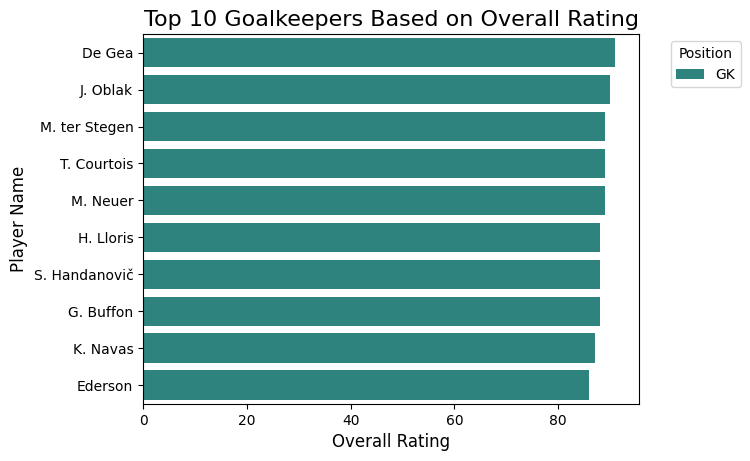

In [ ]:
# Filter relevant columns
columns_to_keep = ['Name', 'Overall', 'Position']
fifa_subset = data[columns_to_keep]

# Drop rows with missing values
fifa_cleaned = fifa_subset.dropna()

# Define goalkeeper position
goalkeeper_position = ['GK']

# Filter for goalkeepers
fifa_goalkeepers = fifa_cleaned[fifa_cleaned['Position'].isin(goalkeeper_position)]

# Get the top 10 goalkeepers based on Overall rating
top_goalkeepers = fifa_goalkeepers.nlargest(10, 'Overall')

# Visualize the top goalkeepers
#plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Overall', y='Name', data=top_goalkeepers, palette='viridis', hue='Position')
plt.title('Top 10 Goalkeepers Based on Overall Rating', fontsize=16)
plt.xlabel('Overall Rating', fontsize=12)
plt.ylabel('Player Name', fontsize=12)
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

I observed that David De Gea, Jan Oblak, and Marc-André ter Stegen lead the list of top-rated goalkeepers, showcasing consistent performances marked by agility, shot-stopping ability, and leadership, while other notable names.

 The minimal difference in ratings among these players emphasizes how competitive this group is. Buffon’s presence, despite his age, highlights his lasting impact and legendary status in football.

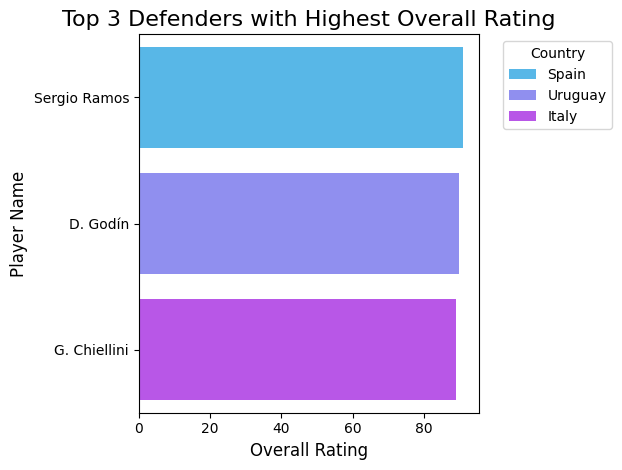

In [ ]:
# Filter relevant columns
columns_to_keep = ['Name', 'Overall', 'Position', 'Nationality',"Club"]
fifa_subset = data[columns_to_keep]

# Drop rows with missing values
fifa_cleaned = fifa_subset.dropna()

# Define defender positions
defender_positions = ['RB', 'CB', 'LB', 'RCB', 'LCB', 'RWB', 'LWB']

# Filter for defenders
fifa_defenders = fifa_cleaned[fifa_cleaned['Position'].isin(defender_positions)]

# Get the top 3 defenders based on Overall rating
top_defenders = fifa_defenders.nlargest(3, 'Overall')

# Visualize the top defenders
#plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Overall', y='Name', data=top_defenders, palette='cool', hue='Nationality')
plt.title('Top 3 Defenders with Highest Overall Rating', fontsize=16)
plt.xlabel('Overall Rating', fontsize=12)
plt.ylabel('Player Name', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

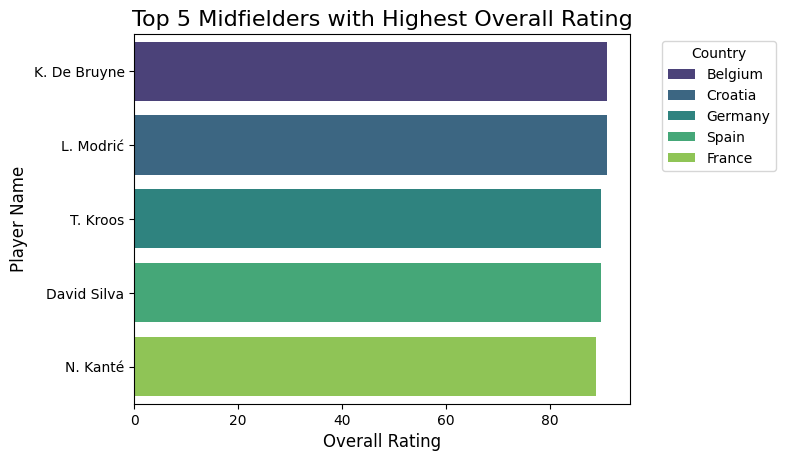

In [ ]:
# Define midfielder positions
midfielder_positions = ['CM', 'CDM', 'CAM', 'LM', 'RM', 'RCM', 'LCM', 'LAM', 'RDM', 'LDM', 'RAM']

# Filter for midfielders
fifa_midfielders = fifa_cleaned[fifa_cleaned['Position'].isin(midfielder_positions)]

# Get the top 5 midfielders based on Overall rating
top_midfielders = fifa_midfielders.nlargest(5, 'Overall')

# Visualize the top midfielders
#plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Overall', y='Name', data=top_midfielders, palette='viridis', hue='Nationality')
plt.title('Top 5 Midfielders with Highest Overall Rating', fontsize=16)
plt.xlabel('Overall Rating', fontsize=12)
plt.ylabel('Player Name', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

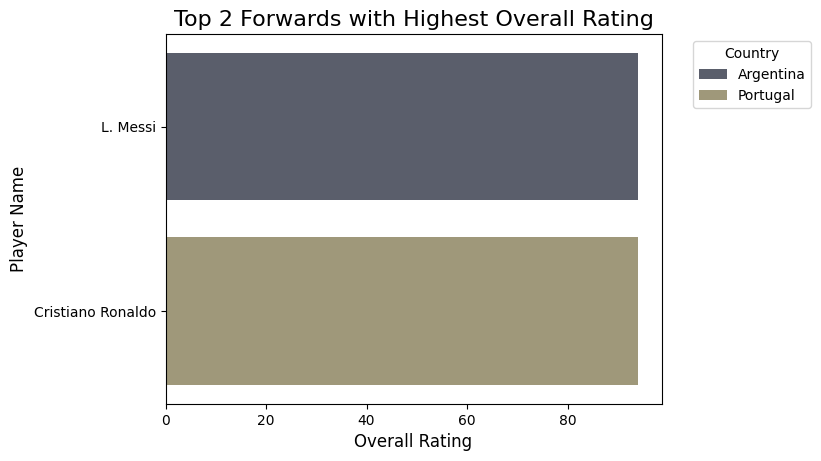

In [ ]:
# Filter for forwards
fifa_forwards = fifa_cleaned[fifa_cleaned['Position'].isin(forward_positions)]

# Get the top 2 forwards based on Overall rating
top_forwards = fifa_forwards.nlargest(2, 'Overall')
# Visualize the top forwards
#plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Overall', y='Name', data=top_forwards, palette='cividis', hue='Nationality')
plt.title('Top 2 Forwards with Highest Overall Rating', fontsize=16)
plt.xlabel('Overall Rating', fontsize=12)
plt.ylabel('Player Name', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-52-54deb86d11ab>:26: UserWarning: The palette list has more values (11) than needed (7), which may not be intended.
  barplot = sns.barplot(


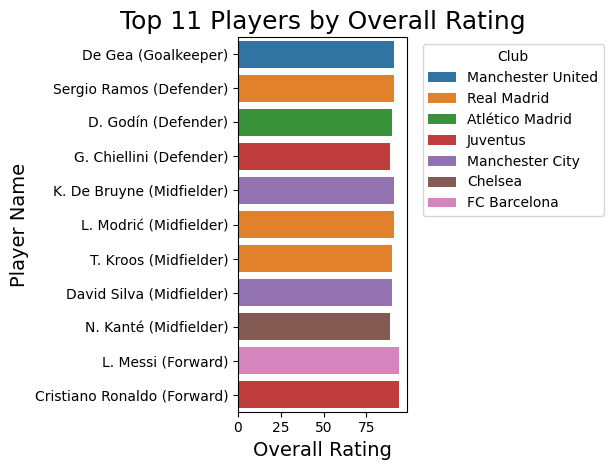

In [ ]:
# Define positions
goalkeeper_positions = ['GK']
defender_positions = ['RB', 'CB', 'LB', 'RCB', 'LCB', 'RWB', 'LWB']
midfielder_positions = ['CM', 'CDM', 'CAM', 'LM', 'RM', 'RCM', 'LCM', 'LAM', 'RDM', 'LDM', 'RAM']
forward_positions = ['RF', 'ST', 'LW', 'LF', 'RS', 'RW', 'CF', 'LS']

# Select top players for each category
top_goalkeeper = fifa_cleaned[fifa_cleaned['Position'].isin(goalkeeper_positions)].nlargest(1, 'Overall')
top_defenders = fifa_cleaned[fifa_cleaned['Position'].isin(defender_positions)].nlargest(3, 'Overall')
top_midfielders = fifa_cleaned[fifa_cleaned['Position'].isin(midfielder_positions)].nlargest(5, 'Overall')
top_forwards = fifa_cleaned[fifa_cleaned['Position'].isin(forward_positions)].nlargest(2, 'Overall')

# Add player role to the Name column
top_goalkeeper['Name'] = top_goalkeeper['Name'] + " (Goalkeeper)"
top_defenders['Name'] = top_defenders['Name'] + " (Defender)"
top_midfielders['Name'] = top_midfielders['Name'] + " (Midfielder)"
top_forwards['Name'] = top_forwards['Name'] + " (Forward)"

# Combine into a single DataFrame
top_players = pd.concat([top_goalkeeper, top_defenders, top_midfielders, top_forwards])

# Generate distinct colors for each player
distinct_colors = sns.color_palette("tab10", len(top_players))  # Generate unique colors

# Visualize the top 11 players and set the legend to display the club
barplot = sns.barplot(
    x='Overall',
    y='Name',
    data=top_players,
    palette=distinct_colors,
    hue='Club'  # Use club as the hue parameter
)

# Place the legend along the y-axis
plt.title('Top 11 Players by Overall Rating', fontsize=18)
plt.xlabel('Overall Rating', fontsize=14)
plt.ylabel('Player Name', fontsize=14)

# Adjust legend position and title
plt.legend(title='Club', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# **CONCLUSION**








The Ideal/Formidable XI has David De Gea Standing Tall as the goal keeper, 3 solid defenders, 5 Midfielders with Kante supporting the defense as a DM. Then Messi and Ronaldo to finish as lethal strikers/forwards.  The Chart also shows Real Madrid being dominant with 3 players in the XI, seconded by Juventus (2).